In [1]:
import numpy as np
from scipy.stats import multivariate_normal as normal
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Student: Elvis M. Teixeira


## Exercise 02.06 (Partialy complete)

We create visualizations for each of the required covariances $\Sigma^{(F)}$, $\Sigma^{(D)}$, etc...

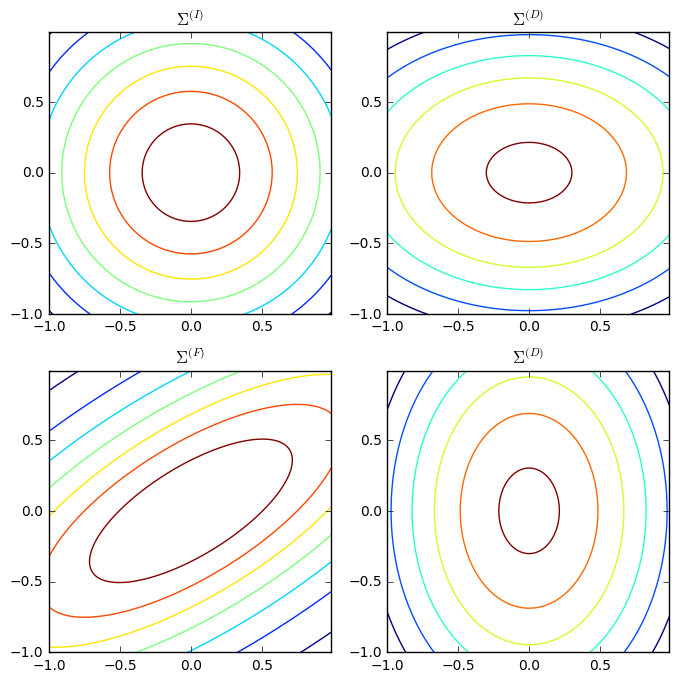

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
fig.figsize = (30,30)

x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

rv = normal([0.0, 0.0], [[1.0, 0.0], [0.0, 1.0]])
ax[0,0].set_aspect('equal')
ax[0,0].contour(x, y, rv.pdf(pos))
ax[0,0].set_title('$\Sigma^{(I)}$')

rv = normal([0.0, 0.0], [[2.0, 0.0], [0.0, 1.0]])
ax[0,1].set_aspect('equal')
ax[0,1].contour(x, y, rv.pdf(pos))
ax[0,1].set_title('$\Sigma^{(D)}$')

rv = normal([0.0, 0.0], [[2.0, 2.5], [1.0, 1.0]])
ax[1,0].set_aspect('equal')
ax[1,0].contour(x, y, rv.pdf(pos))
ax[1,0].set_title('$\Sigma^{(F)}$')

rv = normal([0.0, 0.0], [[1.0, 0.0], [0.0, 2.0]])
ax[1,1].set_aspect('equal')
ax[1,1].contour(x, y, rv.pdf(pos))
ax[1,1].set_title('$\Sigma^{(D)}$')

plt.show()

# Exercise 02.07 (Partialy complete)

## Visualize dataset

In [3]:
data = pd.read_csv('dataset.txt', sep='\s+')

print('First few data lines:')
data[:5]

First few data lines:


,x_1,x_2,c
0,0.258703,0.392774,1
1,-0.648964,-0.354155,1
2,-0.360602,0.061209,1
3,0.311283,-1.087857,0
4,-1.036360,0.296320,1


visualize data


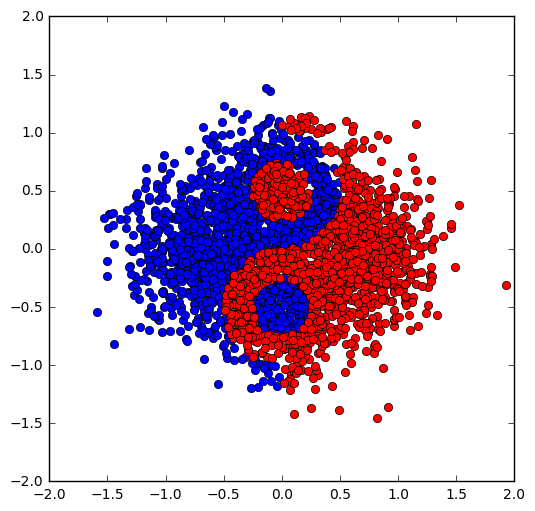

In [37]:
data_c1 = data[data['c'] == 1]
data_c2 = data[data['c'] == 0]
plt.figure(figsize=(6,6))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(data_c1.ix[:,0], data_c1.ix[:,1], 'bo')
plt.plot(data_c2.ix[:,0], data_c2.ix[:,1], 'ro')
print('visualize data')
plt.show()

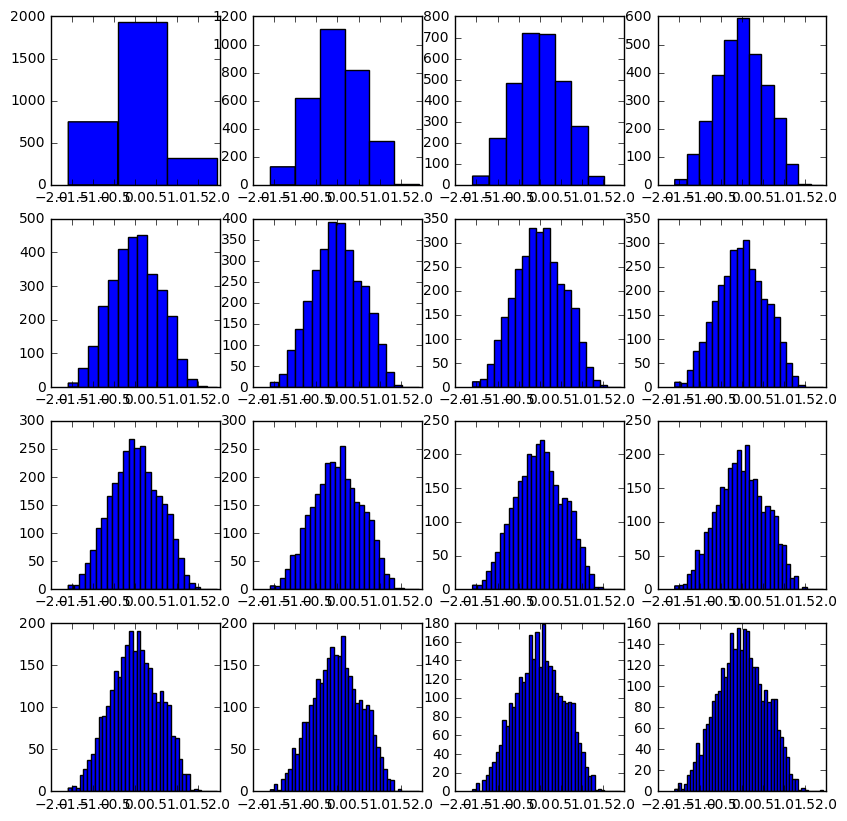

In [31]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
axes = np.concatenate(axes).ravel()

for i, ax in enumerate(axes):
    ax.hist(data['x_1'], bins=3+3*i)

plt.show()

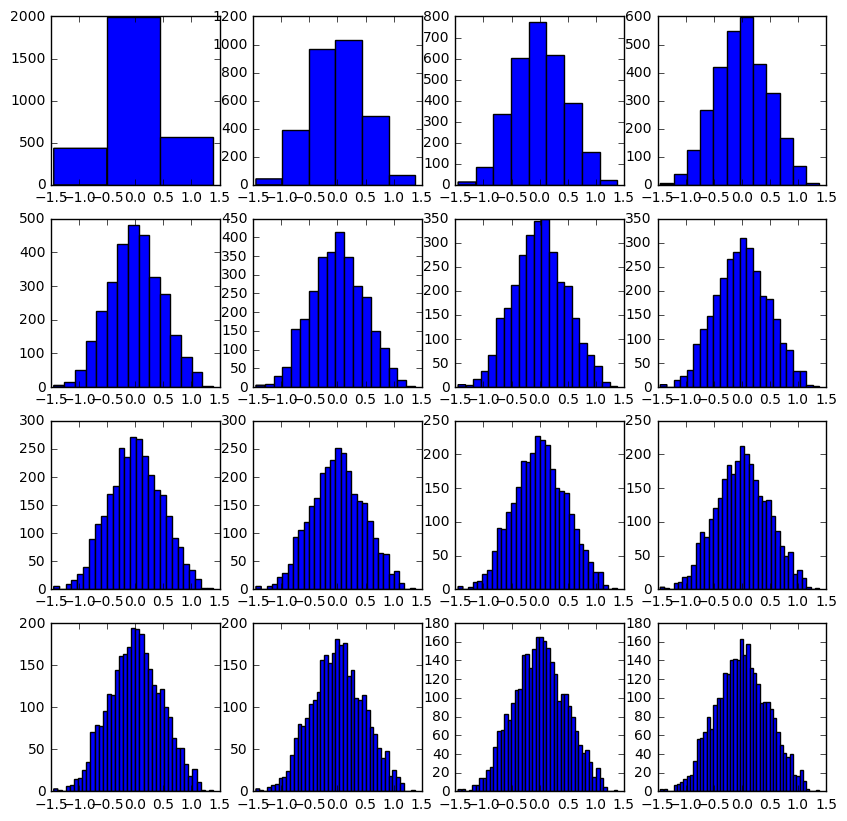

In [32]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
axes = np.concatenate(axes).ravel()

for i, ax in enumerate(axes):
    ax.hist(data['x_2'], bins=3+3*i)

plt.show()

By the figures above we can see that a good number of bins for these histograms is about 24~25


## KNN Classifier

In [46]:
def KNN(k, target, data):
    dists = []
    for i, row in enumerate(data):
        diff = target - row[:-1]
        dists.append((i, diff.dot(diff)))
    dists = sorted(dists, key=lambda x: x[1])
    classes = {}
    if len(dists) == 0 or k <= 0:
        raise RuntimeError('Invalid input')
    for (i, d) in dists:
        c = data[i,-1]
        if c not in classes: classes[c] = 1
        else: classes[c] += 1
        if classes[c] == k:
            return c
    raise RuntimeError('Can not determine class')

In [47]:
data_matrix = data.as_matrix()

# Assert that the KNN works
sample = data_matrix[3,:-1]
KNN(5, sample, data_matrix) == data_matrix[3,-1]

True